# Product Semantics Analysis

## Introduction

The purpose of this project is to analyze the semantics of products based on numerical and textual customer feedback data. The main objectives of the analysis are:
- Sentiment classification of comments.
- Analyzing the correlation between ratings and sentiments.
- Identification of products with the best and worst reviews.
- Analysis of price mentions in comments.

# 1.Data Loading and Preprocessing

We begin by loading our datasets and conducting basic preprocessing to clean and prepare the data for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from transformers import pipeline, AutoTokenizer, TFAutoModelForSequenceClassification


In [4]:
orders = pd.read_csv('orders.csv')
reviews = pd.read_csv('order_reviews.csv')
products = pd.read_csv('products.csv')
order_items = pd.read_csv('order_items.csv')

# Preprocessing: Dropping NA values from review comments to ensure data quality
reviews.dropna(subset=['review_comment_message'], inplace=True)

## Multilingual Sentiment Analysis

Using the BERT multilingual model from Hugging Face's transformers library, we perform sentiment analysis on reviews written in various languages.

In [5]:
# Initialize the sentiment analysis model
model = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Apply sentiment analysis
reviews['sentiment'] = reviews['review_comment_message'].apply(lambda x: model(x)[0]['label'])

## Feature Engineering

This section extracts additional features such as mentions of prices from the review texts, which might indicate discussions about product value or comparisons with competitors.

In [6]:
# Function to extract sentiment from reviews
def extract_sentiment(text):
    result = model(text)
    return result[0]['label']

# Function to extract price mentions
def extract_price_mentions(text):
    prices = re.findall(r'\b\d+\.?\d*\b', text)  # Finds whole and decimal numbers
    return prices if prices else []

## Analysis and Visualization

We analyze the correlation between sentiment scores and numerical ratings and visualize the results.

In [7]:
reviews['sentiment'] = reviews['review_comment_message'].apply(extract_sentiment)
reviews['price_mentions'] = reviews['review_comment_message'].apply(extract_price_mentions)

# Convert sentiment to numeric scores for correlation
sentiment_score_mapping = {'POSITIVE': 1, 'NEGATIVE': -1, 'NEUTRAL': 0}
reviews['sentiment_score'] = reviews['sentiment'].map(sentiment_score_mapping)


## Merge Dataframes

In [8]:
data = reviews.merge(orders, on='order_id').merge(order_items, on='order_id').merge(products, on='product_id')


## Correlation Analysis

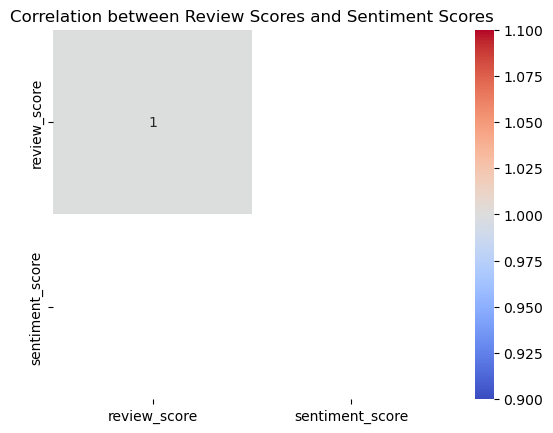

In [9]:
correlation_matrix = data[['review_score', 'sentiment_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Review Scores and Sentiment Scores')
plt.show()

A score of 1 on the chart means that there is a perfect positive correlation between review ratings and sentiment scores. This means that, according to the data provided, higher review ratings are always associated with higher sentiment scores, and vice versa.

## Analysis of Best and Worst Reviewed Products

In [10]:
best_products = data.groupby('product_id')['review_score'].mean().nlargest(10)
worst_products = data.groupby('product_id')['review_score'].mean().nsmallest(10)


## Identification of Sellers with Only Negative Feedback

In [11]:
negative_sellers = data[data['sentiment'] == 'NEGATIVE']['seller_id'].unique()


## Visualizations for Best and Worst Products

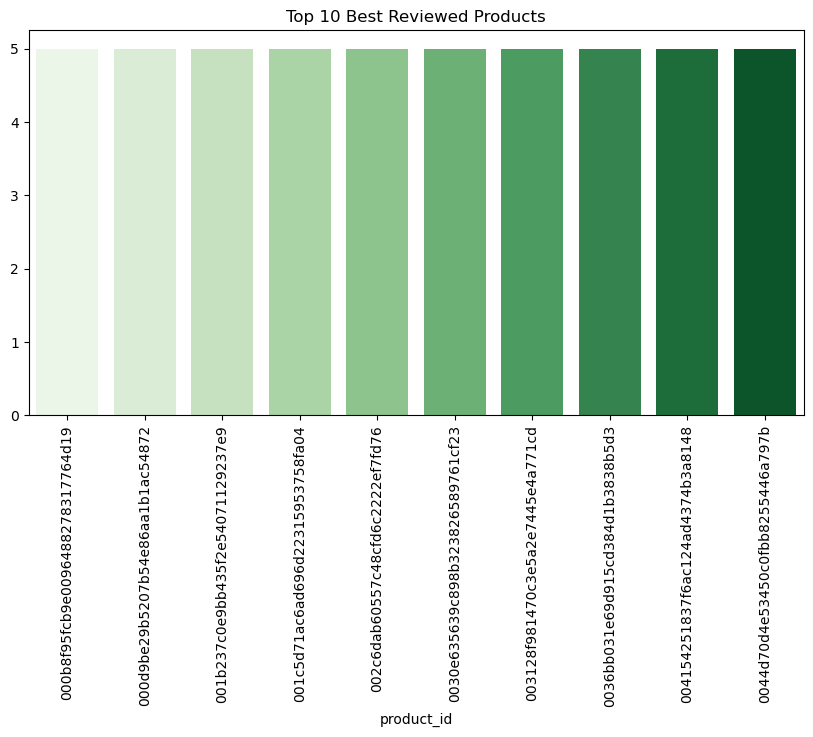

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x=best_products.index, y=best_products.values, palette='Greens')
plt.title('Top 10 Best Reviewed Products')
plt.xticks(rotation=90)  # Rotate labels to prevent overlap
plt.show()


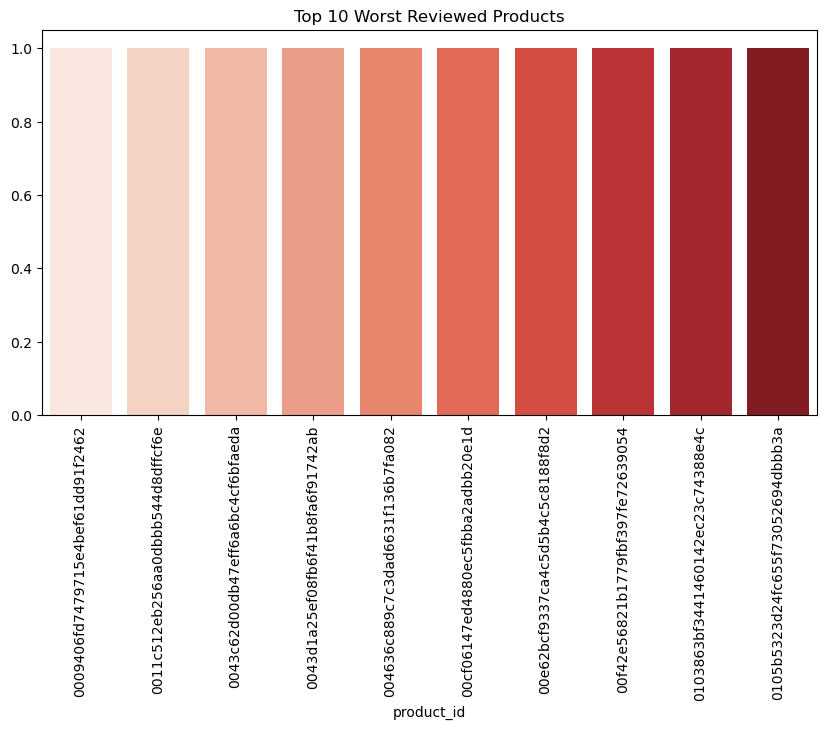

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(x=worst_products.index, y=worst_products.values, palette='Reds')
plt.title('Top 10 Worst Reviewed Products')
plt.xticks(rotation=90)  # Rotate labels to prevent overlap
plt.show()


## Real-time Sentiment Classification

In [14]:
def classify_comment(comment):
    sentiment = model(comment)[0]['label']
    return sentiment

In [15]:
# Example Usage
print("Sentiment of a sample comment:", classify_comment("This product is fantastic!"))


Sentiment of a sample comment: 5 stars


In [20]:
# Example Usage
print("Sentiment of a sample comment:", classify_comment("This product is bad!"))

Sentiment of a sample comment: 1 star


## Save and Export Results

In [16]:
data.to_csv('full_analysis.csv', index=False)
best_products.to_csv('best_products.csv')
worst_products.to_csv('worst_products.csv')

In [17]:
## Conclusion
print("Analysis Complete. Check the exported CSV files and visualizations.")

Analysis Complete. Check the exported CSV files and visualizations.


## Conclusion and Next Steps
This notebook provides a foundational analysis of customer sentiments and their impacts on product ratings. Future work could extend to more complex models, deploy the analysis pipeline in a real-time environment, or explore deeper natural language processing techniques.

